In [2]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")


In [3]:
# Upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [4]:
# Criando nosso DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [5]:
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [7]:
# Verificando tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
# Qual é a receita total?
df["Valor Venda"].sum()


5984606.1426

In [10]:
# Qual custo total?
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])  # Criando uma coluna de custo


In [11]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [12]:
# Qual o custo total?
round(df["custo"].sum(), 2) # O 2 é para retornar 2 casas decimais.

2486783.05

In [14]:
# Agora que temos a receita e custo e o total, podemos achar o lucro total.
# Vamos criar uma coluna de lucro que será Receita - Custo.
df["lucro"] = df["Valor Venda"] - df["custo"]
print(df.head(1))

  Data Venda Data Envio  ID Loja  ID Produto  ...   Classe  Cor    custo    lucro
0 2008-05-09 2008-05-29      199         384  ...  Regular  Red  2091.48  2456.52

[1 rows x 18 columns]


In [15]:
# Total do lucro
round(df["lucro"].sum(),2)

3497823.09

In [16]:
# Criando uma coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]
print(df.head(1))

  Data Venda Data Envio  ID Loja  ID Produto  ...  Cor    custo    lucro  Tempo_envio
0 2008-05-09 2008-05-29      199         384  ...  Red  2091.48  2456.52      20 days

[1 rows x 19 columns]


In [ ]:
Determinar a média do tempo de envio de cada marca, vamos transformar a coluna Tempo_envio em numérica pq ela está como str.

In [17]:
# Extraindo apenas os dias
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
print(df.head(1))

  Data Venda Data Envio  ID Loja  ...    custo    lucro Tempo_envio
0 2008-05-09 2008-05-29      199  ...  2091.48  2456.52          20

[1 rows x 19 columns]


In [18]:
# Verificando o tipo de coluna Tempo_envio
df["Tempo_envio"].dtype

dtype('int64')

In [19]:
# Média do tempo de envio por Marca
df.groupby("Marca")["Tempo_envio"].mean()


Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

In [20]:
# Verificando se temos valores ausentes.
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

In [25]:
#Vamos agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [27]:
# Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
print(lucro_ano)

   Data Venda            Marca                lucro
0        2008  Adventure Works           306,641.16
1        2008          Contoso            56,416.00
2        2008         Fabrikam         1,557,020.55
3        2009  Adventure Works           405,395.08
4        2009          Contoso           138,258.95
5        2009         Fabrikam         1,034,091.35


In [28]:
# Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

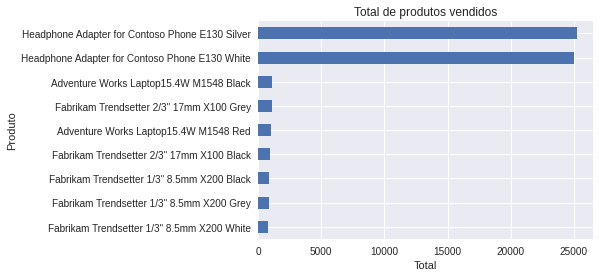

In [29]:
# Gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de produtos vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

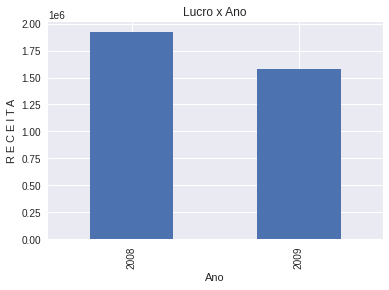

In [30]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("R E C E I T A");

In [31]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [33]:
# Selecionando apenas as vendas em 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
print(df_2009)

    Data Venda Data Envio  ...                lucro  Tempo_envio
11  2009-05-02 2009-05-14  ...             2,456.52           12
12  2009-05-16 2009-05-27  ...             2,456.52           11
13  2009-05-31 2009-06-12  ...             2,456.52           12
14  2009-06-28 2009-07-11  ...             2,456.52           13
15  2009-07-08 2009-07-12  ...             2,456.52            4
..         ...        ...  ...                  ...          ...
890 2009-12-23 2009-12-30  ...             2,755.86            7
895 2009-01-11 2009-01-18  ...             3,049.86            7
896 2009-03-04 2009-03-15  ...             2,755.86           11
897 2009-06-12 2009-06-22  ...             3,408.66           10
898 2009-06-25 2009-07-06  ...             3,343.86           11

[435 rows x 19 columns]


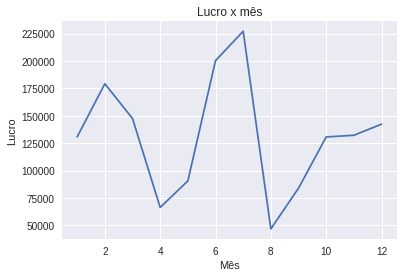

In [34]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

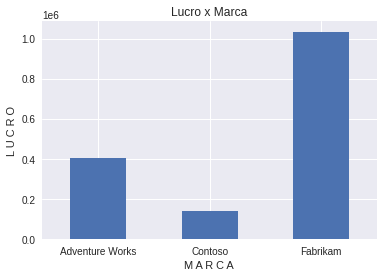

In [35]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("M A R C A ")
plt.ylabel(" L U C R O ")
plt.xticks(rotation='horizontal');

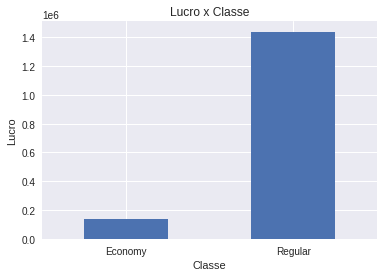

In [40]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [41]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

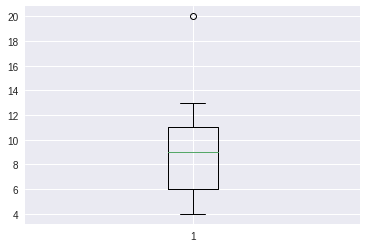

In [42]:
# Gráfico de Boxplot
plt.boxplot(df["Tempo_envio"]);

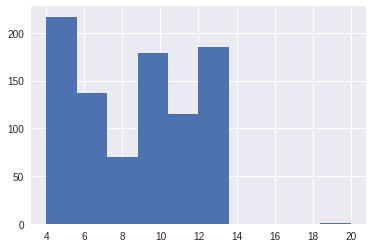

In [43]:
# Historiograma
plt.hist(df["Tempo_envio"]);

In [44]:
# Tempo mínimo de envio.
df["Tempo_envio"].min()

4

In [45]:
# Tempo máximo de envio
df["Tempo_envio"].max()

20

In [46]:
# Idetntificando um Outilier
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [47]:
df.to_csv("df_vendas_novo.csv", index=False)